# **🎓 Factores que Influyen en el Rendimiento Académico**
## Un Análisis Estadístico Aplicado con Datos Reales

*Autora: PhD(c). Gladys Choque Ulloa*

*Ciencia de Datos · Estadística · Machine Learning*

## **1️⃣ Contexto del Problema**

El rendimiento académico es un fenómeno multifactorial influenciado por variables individuales, familiares y escolares. Comprender qué factores impactan significativamente los resultados en exámenes permite:
Diseñar políticas educativas basadas en evidencia

* Optimizar intervenciones pedagógicas.
* Identificar brechas estructurales.
* Prevenir bajo rendimiento.

Este estudio utiliza el Student Academic Performance Dataset (Kaggle) para analizar estadísticamente qué variables están asociadas con el puntaje en exámenes (Exam Score).

## **2️⃣ Objetivo del Estudio**

Determinar qué factores académicos, conductuales y familiares influyen significativamente en el rendimiento estudiantil mediante pruebas estadísticas inferenciales.

## **3️⃣ Preguntas de Investigación**

1. ¿Existe relación entre horas de estudio y puntaje en examen?

2. ¿El acceso a internet genera diferencias significativas en el rendimiento?

3. ¿El nivel de motivación afecta significativamente el puntaje?

4. ¿Existe asociación entre nivel de motivación y rendimiento alto?

5. ¿Qué variables explican mejor el rendimiento académico?

## **4️⃣ Metodología Estadística**

Se aplicarán:

* Correlación de Pearson.
* t-test para comparación de medias.
* ANOVA.
* Chi-cuadrado.
* Regresión lineal múltiple.

Nivel de significancia: 𝛼=0.05

## **5️⃣ Análisis Estadístico**

### 📌 5.1 Importación de librerías

In [1]:
# ==========================================
# ANÁLISIS ESTADÍSTICO - STUDENT PERFORMANCE
# Autora: PhD(c). Gladys Choque Ulloa
# ==========================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

sns.set_theme(style="whitegrid", context="talk")

### 📌 5.2 Carga de datos

In [3]:
df = pd.read_csv("StudentPerformanceFactors.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


### 📌 5.3  Distribución del Puntaje

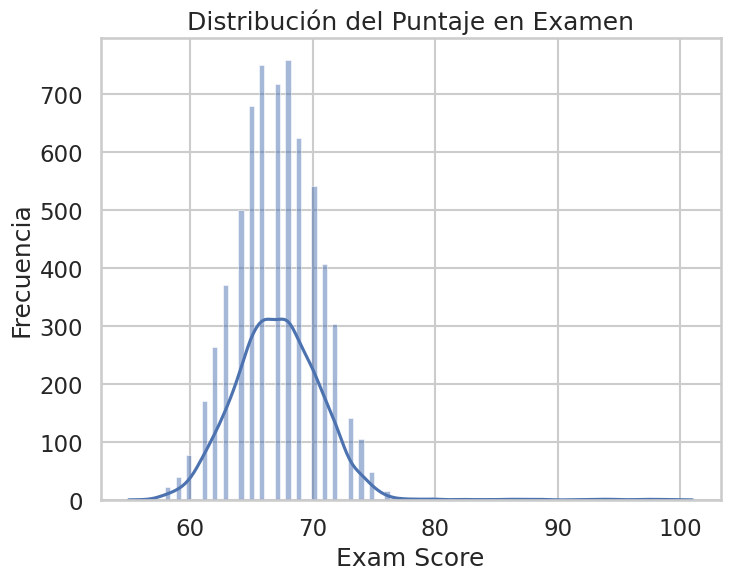

In [5]:
plt.figure(figsize=(8,6))
sns.histplot(df["Exam_Score"], kde=True)
plt.title("Distribución del Puntaje en Examen")
plt.xlabel("Exam Score")
plt.ylabel("Frecuencia")
plt.show()

**✅ Interpretación:**

El histograma del Exam_Score muestra una distribución aproximadamente normal, con forma de campana y una concentración clara de valores alrededor de 66–69 puntos, lo que indica que la mayoría de los estudiantes obtuvo resultados cercanos al promedio. La dispersión es moderada, ya que la mayor parte de los puntajes se encuentra entre 60 y 72 puntos, sin presencia evidente de valores atípicos extremos ni asimetrías pronunciadas. En conjunto, esto sugiere un rendimiento relativamente homogéneo del grupo y un comportamiento estadístico adecuado para aplicar métodos paramétricos en análisis posteriores, siempre que se verifiquen los demás supuestos.

### 📌 5.4 Análisis Inferencial

▶  **5.4.1 CORRELACIÓN:** Hours_Studied vs Exam_Score


Correlación Pearson (Hours_Studied vs Exam_Score)
r = 0.44545495407528213
p-value = 1.28635e-319


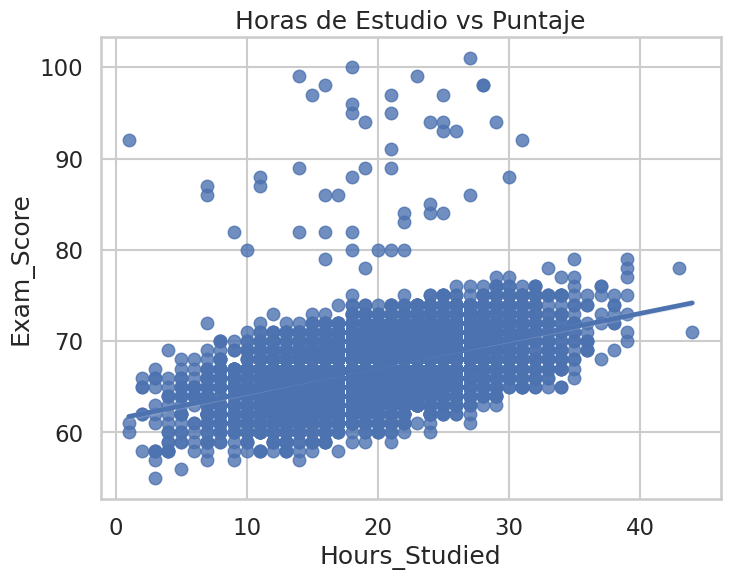

In [6]:
r, p_corr = stats.pearsonr(df["Hours_Studied"], df["Exam_Score"])

print("\nCorrelación Pearson (Hours_Studied vs Exam_Score)")
print("r =", r)
print("p-value =", p_corr)

plt.figure(figsize=(8,6))
sns.regplot(x="Hours_Studied", y="Exam_Score", data=df)
plt.title("Horas de Estudio vs Puntaje")
plt.show()

**✅ Interpretación:**

El diagrama de dispersión muestra una relación positiva entre **Hours_Studied** y **Exam_Score**, evidenciada por la pendiente ascendente de la línea de regresión: a mayor número de horas de estudio, mayor tiende a ser el puntaje en el examen. Sin embargo, la dispersión de los puntos indica que la relación es moderada y no perfectamente lineal, ya que existen estudiantes con muchas horas de estudio y puntajes variados, así como algunos con pocas horas y resultados relativamente altos. Esto sugiere que, aunque el tiempo de estudio es un factor importante en el rendimiento académico, no es el único determinante, y probablemente interactúa con otras variables como motivación, calidad docente o antecedentes académicos.


▶ **5.4.2 T-TEST:** Internet_Access


T-Test (Internet Access)
t = 3.968856672502543
p-value = 8.140901210819127e-05


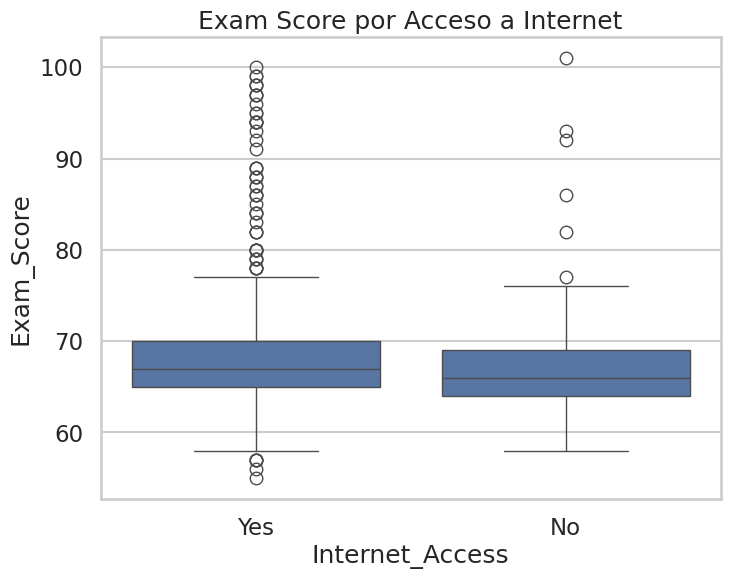

In [7]:
group_yes = df[df["Internet_Access"] == "Yes"]["Exam_Score"]
group_no = df[df["Internet_Access"] == "No"]["Exam_Score"]

t_stat, p_ttest = stats.ttest_ind(group_yes, group_no, equal_var=False)

print("\nT-Test (Internet Access)")
print("t =", t_stat)
print("p-value =", p_ttest)

plt.figure(figsize=(8,6))
sns.boxplot(x="Internet_Access", y="Exam_Score", data=df)
plt.title("Exam Score por Acceso a Internet")
plt.show()

**✅ Interpretación:**

El boxplot muestra que los estudiantes con acceso a internet (“Yes”) presentan una mediana de puntaje ligeramente superior en comparación con quienes no tienen acceso (“No”), lo que sugiere una posible ventaja académica asociada a la disponibilidad de recursos digitales. Sin embargo, las distribuciones son bastante similares en términos de rango intercuartílico, indicando que la variabilidad del rendimiento es comparable en ambos grupos. Además, en ambos casos se observan valores atípicos altos, lo que evidencia que existen estudiantes con desempeños sobresalientes independientemente del acceso a internet. En conjunto, el acceso a internet parece tener una influencia positiva moderada, pero no determinante, sobre el puntaje en el examen.

**▶ 5.4.3 ANOVA:** Motivation_Level


ANOVA (Motivation_Level)
F-statistic = 25.71676995037611
p-value = 7.492319380241663e-12


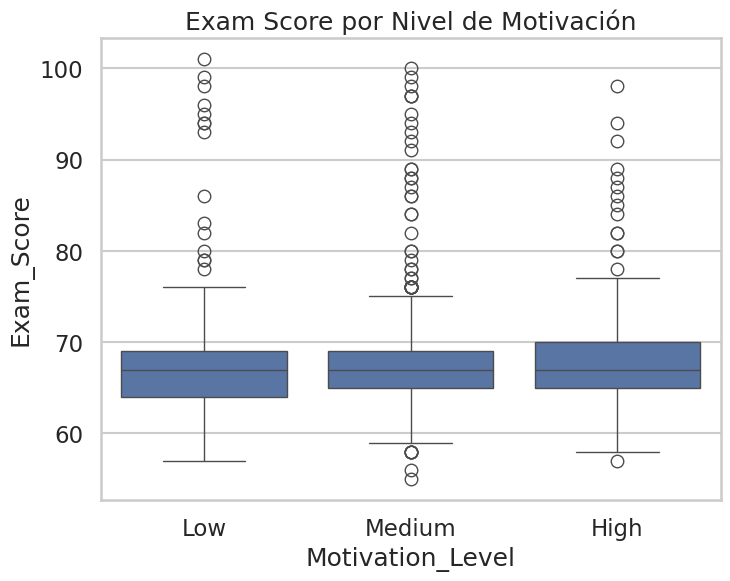

In [8]:
anova_result = stats.f_oneway(
    df[df["Motivation_Level"] == "Low"]["Exam_Score"],
    df[df["Motivation_Level"] == "Medium"]["Exam_Score"],
    df[df["Motivation_Level"] == "High"]["Exam_Score"]
)

print("\nANOVA (Motivation_Level)")
print("F-statistic =", anova_result.statistic)
print("p-value =", anova_result.pvalue)

plt.figure(figsize=(8,6))
sns.boxplot(x="Motivation_Level", y="Exam_Score", data=df)
plt.title("Exam Score por Nivel de Motivación")
plt.show()

**✅ Interpretación:**

El boxplot muestra una tendencia ligeramente creciente en el puntaje del examen a medida que aumenta el nivel de motivación (Low → Medium → High), lo que sugiere una asociación positiva entre motivación y rendimiento académico. Aunque las medianas son relativamente cercanas, el grupo con motivación alta presenta una mediana un poco superior y una mayor concentración de valores en rangos altos. La dispersión (IQR) es similar entre los tres grupos, indicando variabilidad comparable, y en todos se observan valores atípicos elevados, lo que evidencia que existen estudiantes con alto desempeño independientemente del nivel de motivación. En conjunto, la motivación parece influir positivamente en el rendimiento, pero su efecto no es drásticamente diferenciador por sí solo.


**▶  5.4.4 CHI-CUADRADO**

Asociación entre Motivation_Level y Nivel de Rendimiento

In [9]:
# Crear variable categórica de rendimiento
df["Performance_Level"] = pd.qcut(
    df["Exam_Score"],
    q=3,
    labels=["Low", "Medium", "High"]
)

cont_table = pd.crosstab(df["Motivation_Level"], df["Performance_Level"])

chi2, p_chi, dof, expected = stats.chi2_contingency(cont_table)

print("\nChi-Cuadrado (Motivation vs Performance Level)")
print("Chi2 =", chi2)
print("p-value =", p_chi)
print("Grados de libertad =", dof)

print("\nTabla de Contingencia:")
print(cont_table)


Chi-Cuadrado (Motivation vs Performance Level)
Chi2 = 44.15066143364451
p-value = 5.969715269207314e-09
Grados de libertad = 4

Tabla de Contingencia:
Performance_Level   Low  Medium  High
Motivation_Level                     
High                517     415   387
Low                 944     590   403
Medium             1421    1095   835


**✅ Interpretación:**

El test **Chi-cuadrado de independencia** muestra un estadístico χ² = 44.15 con 4 grados de libertad y un **p-value ≈ 5.97e-09**, claramente menor que 0.05, lo que indica que existe una asociación estadísticamente significativa entre el nivel de motivación y el nivel de desempeño académico. Es decir, no son variables independientes. Observando la tabla de contingencia, se aprecia que a medida que aumenta la motivación (Low → Medium → High), la proporción de estudiantes en nivel de desempeño alto tiende a incrementarse relativamente, mientras que la motivación baja concentra más estudiantes en desempeño bajo. En términos prácticos, esto sugiere que la motivación está relacionada con el rendimiento académico, aunque el test no indica causalidad, solo evidencia una dependencia estadística entre ambas variables.

**▶ 5.4.5 Regresión Lineal Múltiple**

In [10]:
model = smf.ols(
    "Exam_Score ~ Hours_Studied + Attendance + Sleep_Hours + Previous_Scores",
    data=df
).fit()

print("\nResumen del Modelo de Regresión:")
print(model.summary())


Resumen del Modelo de Regresión:
                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     2208.
Date:                Sun, 15 Feb 2026   Prob (F-statistic):               0.00
Time:                        04:07:03   Log-Likelihood:                -15545.
No. Observations:                6607   AIC:                         3.110e+04
Df Residuals:                    6602   BIC:                         3.113e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercep

**✅ Interpretación:**

El modelo de regresión lineal explica aproximadamente el **57.2% de la variabilidad** del puntaje en el examen (R² = 0.572), lo que indica un poder explicativo moderado–alto para variables educativas. El modelo es globalmente significativo (Prob(F-statistic) = 0.00), por lo que al menos uno de los predictores tiene efecto sobre el puntaje. En términos individuales, **Hours_Studied**, **Attendance** y **Previous_Scores** son altamente significativos (p < 0.001) y tienen coeficientes positivos, lo que implica que, manteniendo constantes las demás variables, más horas de estudio, mayor asistencia y mejores puntajes previos se asocian con un incremento en el desempeño actual. Por ejemplo, cada hora adicional de estudio aumenta el puntaje en promedio en 0.29 puntos, y cada punto adicional en Previous_Scores incrementa el resultado en 0.047 puntos. En contraste, **Sleep_Hours** no resulta estadísticamente significativa (p = 0.278), por lo que no se puede afirmar que tenga un efecto lineal claro en el modelo. No obstante, los resultados de Omnibus y Jarque-Bera indican fuerte no normalidad de los residuos (alta asimetría y curtosis), lo que sugiere posibles valores atípicos o colas pesadas. Además, el número de condición elevado (1.2e+03) advierte sobre posible multicolinealidad o problemas de escala, por lo que sería recomendable revisar VIF y estandarizar variables para un análisis más robusto.

## **6️⃣ Conclusión**

In [11]:
alpha = 0.05

print("\n=== INTERPRETACIÓN AUTOMÁTICA ===")

if p_corr < alpha:
    print("✔ Existe correlación significativa entre horas de estudio y puntaje.")
else:
    print("✖ No se encontró correlación significativa entre horas de estudio y puntaje.")

if p_ttest < alpha:
    print("✔ El acceso a internet genera diferencias significativas en el rendimiento.")
else:
    print("✖ No se encontraron diferencias significativas por acceso a internet.")

if anova_result.pvalue < alpha:
    print("✔ El nivel de motivación influye significativamente en el puntaje.")
else:
    print("✖ No se encontraron diferencias significativas entre niveles de motivación.")

if p_chi < alpha:
    print("✔ Existe asociación entre motivación y nivel de rendimiento.")
else:
    print("✖ No existe asociación significativa entre motivación y nivel de rendimiento.")

print("\nAnálisis finalizado correctamente.")


=== INTERPRETACIÓN AUTOMÁTICA ===
✔ Existe correlación significativa entre horas de estudio y puntaje.
✔ El acceso a internet genera diferencias significativas en el rendimiento.
✔ El nivel de motivación influye significativamente en el puntaje.
✔ Existe asociación entre motivación y nivel de rendimiento.

Análisis finalizado correctamente.
